## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [1]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df[['TV','radio']].head()

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

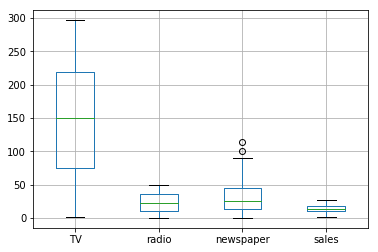

In [4]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

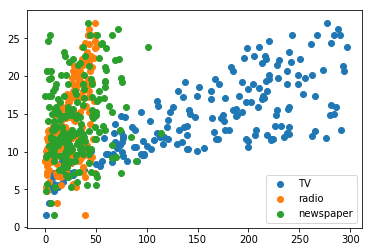

In [5]:
TV=plt.scatter(df['TV'],df['sales'])
radio=plt.scatter(df['radio'],df['sales'])
newspaper=plt.scatter(df['newspaper'],df['sales'])
plt.legend((TV,radio,newspaper),('TV','radio','newspaper'),loc='lower right')
plt.show()
#blue represents TV, orange represents radio and green represents newspaper
#Add Legend

/Users/zhenli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1179792b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a208c47f0>]], dtype=object)

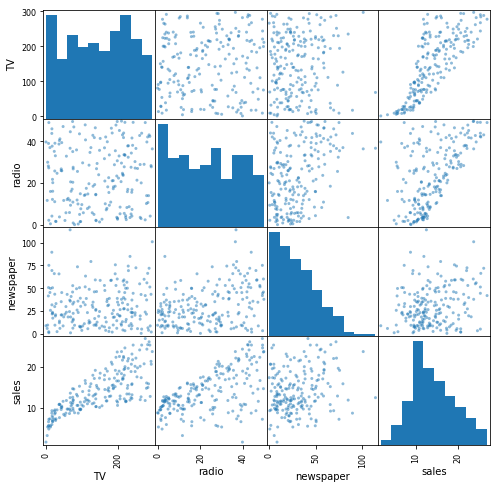

In [7]:
from pandas.tools.plotting import scatter_matrix 
scatter_matrix(df,figsize=(8,8))

Which of the variables seem correlated with one another? Which don't? Explain your answer

##### Ans:
Based on the scatterplot, it does not seem that there are strong correlations among 3 features. Radio and TV are strongly correlated with the sales. 

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [8]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [9]:
y=df['sales']

b) Set X to be just the features described above in df

In [10]:
X=df[['TV','radio','newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [12]:
from sklearn.cross_validation import train_test_split
train,test=train_test_split(df,test_size=0.2)
X_train=train[['TV','radio','newspaper']]
y_train=train['sales']
X_test=test[['TV','radio','newspaper']]
y_test=test['sales']

/Users/zhenli/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


d) Train model on training data, and make predictions on testing data

In [13]:
regr=LinearRegression()
regr.fit(X_train,y_train)
print('predict value:',regr.predict(X_test))

predict value: [ 19.36048644   3.55240204  17.01373094  13.3130647   14.24237904
  14.9471345   15.61194025   9.86789611  13.92063561  11.97505078
   8.83099405  19.05489623  13.60459583  19.27338603  14.78241873
   8.97905638  10.65766502   8.13822647  19.78007296  12.38992298
   8.183317     4.43899418  18.52118122  18.32705225  23.3401582
   8.70099462  12.08630471   8.58332232  15.1659446    9.96623177
   7.42749551  14.52725246  12.82456115  14.66768488  11.71020328
  13.90762955  19.1198133   20.51373255  12.95367505  23.06432716]


e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [15]:
import numpy as np
print('R^2 on test data:',regr.score(X_test,y_test))


R^2 on test data: 0.902754324861


##### Ans:
We can generally say this R^2 shows a good prediction. It means there is 90 percents of variance explained by the model we trained. However, the high R^2 is not enough to obtain the final conclusion of the goodness of this model. We still need to check other aspects to give the final conclusion, for example the distribution of residuals. 

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

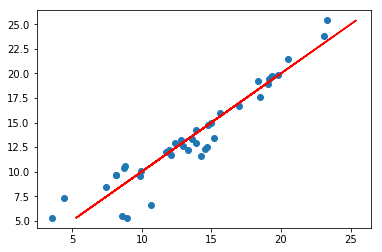

In [16]:
predicted=regr.predict(X_test)
plt.scatter(predicted,y_test)
plt.plot(y_test,y_test,color='r')
plt.show()

##### Ans: 
The plot generally shows a line with slope of 1, which means most of our predictions are closed to the true value.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

##### Ans:
We need to check if the magnitudes of each variables are different from each other so much. If there are large magnitude differences among variables, we need scale procedure before we explain the importance of features in this model. 

In [18]:
from sklearn import preprocessing
import numpy as np
scaler=preprocessing.StandardScaler()
scaled_X_train=X_train.as_matrix().astype(np.float)
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=X_test.as_matrix().astype(np.float)
scaled_X_test=scaler.fit_transform(X_test)
print('Coefficients: \n',regr.coef_)

Coefficients: 
 [ 0.04546116  0.19352497 -0.00418017]


In [19]:
scaled_regr=LinearRegression()
scaled_regr.fit(scaled_X_train,y_train)
print('Coefficients: ',scaled_regr.coef_)
#normalization does not change the power of prediction. Normalizaiton just change the beta in the model when we try to
#understand the importance of feature

Coefficients:  [ 3.9022229   2.91252902 -0.09162233]


In [20]:
scaled_regr.coef_
df=pd.DataFrame({'type':['TV','Radio','Newspaper'],'coef':scaled_regr.coef_})

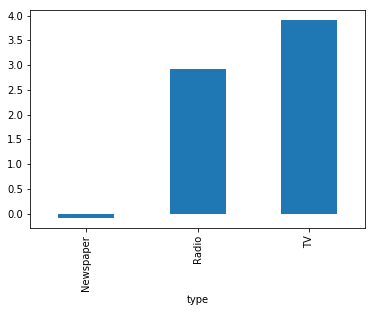

In [21]:
df.groupby('type')['coef'].mean().plot(kind='bar')

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

##### Ans:
After we scale the data, the effect of different magnitudes has been eliminated. If we cares about the efficiency of different type of advertisement, the scale process should be done before we consider the importance of the features involved.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

/Users/zhenli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


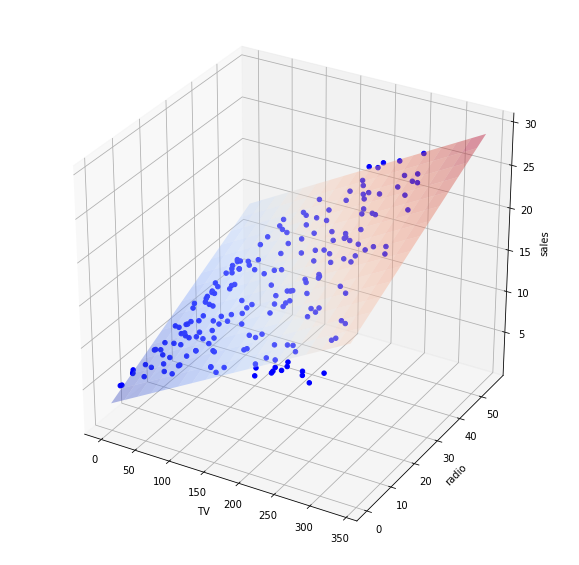

In [25]:
#plot 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

df=pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
model=sm.ols(formula='sales~TV+radio',data=df)
fit=model.fit()
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')
x_surf=np.arange(0,350,20)
y_surf=np.arange(0,60,4)
x_surf,y_surf=np.meshgrid(x_surf,y_surf)
exog=pd.core.frame.DataFrame({'TV':x_surf.ravel(),'radio':y_surf.ravel()})
out=fit.predict(exog=exog)
ax.plot_surface(x_surf,y_surf,
               out.reshape(x_surf.shape),
               rstride=1,
               cstride=1,
               color='None',
               alpha=0.4,cmap=cm.coolwarm)
ax.scatter(df['TV'],df['radio'],df['sales'],
          c='blue',marker='o',alpha=1)
ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')
plt.show()

In [26]:
# Introduce mixture term
df['TV*radio']=df['TV']*df['radio']
df=df.drop(['newspaper'],1)

In [27]:
df.head()

,TV,radio,sales,TV*radio
1,230.1,37.8,22.1,8697.78
2,44.5,39.3,10.4,1748.85
3,17.2,45.9,9.3,789.48
4,151.5,41.3,18.5,6256.95
5,180.8,10.8,12.9,1952.64


In [28]:
train_mix,test_mix=train_test_split(df,test_size=0.2)

In [29]:
X_train_mix=train_mix[['TV','radio','TV*radio']]
y_train_mix=train_mix['sales']
X_test_mix=test_mix[['TV','radio','TV*radio']]
y_test_mix=test_mix['sales']

In [30]:
regr_new=LinearRegression()
regr_new.fit(X_train_mix,y_train_mix)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
print('Coefficients: ',regr_new.coef_)

Coefficients:  [ 0.02011826  0.02890617  0.00106566]


In [32]:
print('R^2:',regr_new.score(X_test_mix,y_test_mix))

R^2: 0.981847467409


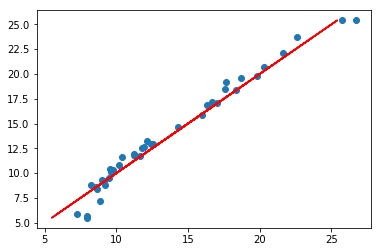

In [31]:
predicted_mix=regr_new.predict(X_test_mix)
plt.scatter(predicted_mix,y_test_mix)
plt.plot(y_test_mix,y_test_mix,color='r')
plt.show()

/Users/zhenli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


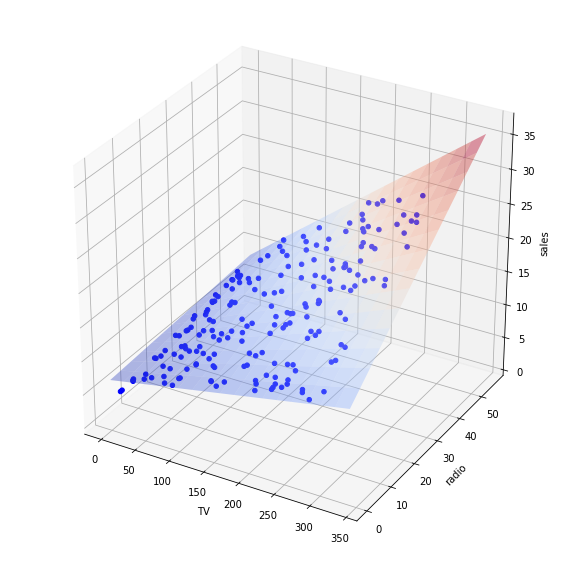

In [34]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm
df=pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
model=sm.ols(formula='sales~TV*radio',data=df)
fit=model.fit()
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')
x_surf=np.arange(0,350,20)
y_surf=np.arange(0,60,4)
x_surf,y_surf=np.meshgrid(x_surf,y_surf)
exog=pd.core.frame.DataFrame({'TV':x_surf.ravel(),'radio':y_surf.ravel()})
out=fit.predict(exog=exog)
ax.plot_surface(x_surf,y_surf,
               out.reshape(x_surf.shape),
               rstride=1,
               cstride=1,
               color='None',
               alpha=0.4,cmap=cm.coolwarm)
ax.scatter(df['TV'],df['radio'],df['sales'],
          c='blue',marker='o',alpha=1)
ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')
plt.show()

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


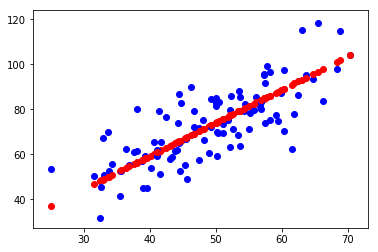

In [35]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1],color='b')
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


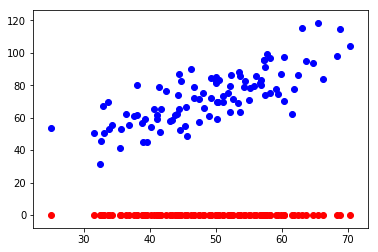

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


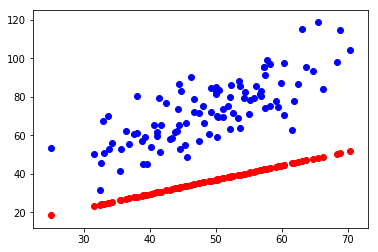

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


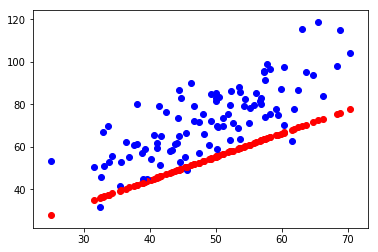

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


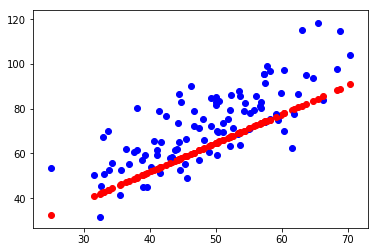

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


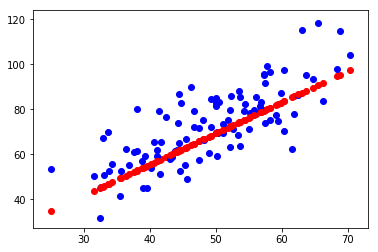

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


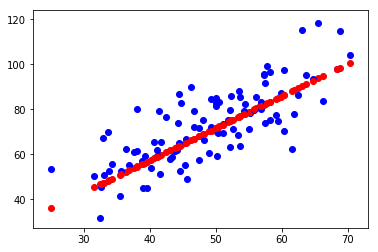

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


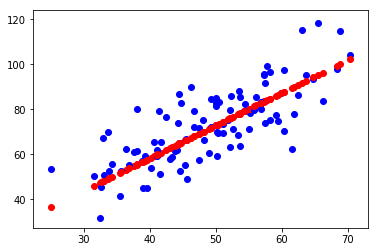

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


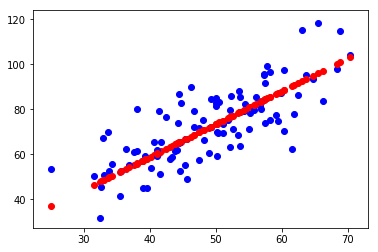

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


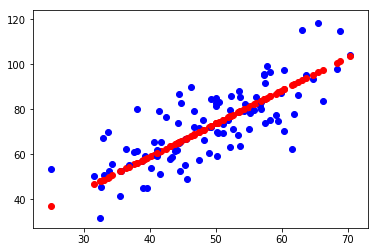

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


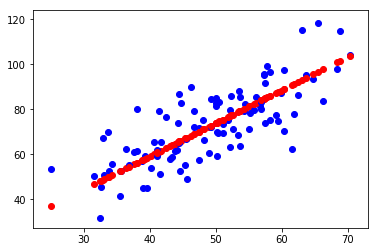

In [36]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,10):
    run(num)
    plt.show()


##### Ans:
Learning rate is the pace of updating the parameter in the model. As we see the Gradient Descent Algorithm, learning rate term is incorporated in the procedure of updating b and m. The equation $$new\_b=b\_current-(learningRate*b\_gradient)$$ $$new\_m=m\_current-(learningRate*m\_gradient)$$
 If the learning rate is too slow, it will take long to obtained the optimal parameters. If the learing rate is too fast, the optimal paramenters will probably be skipped and the parameters every time updated vibrate among the optimal's neighberhood, which leads that the converge does not happen.

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

In [33]:
def run_w_rating(num_iterations,learning_rate= 0.0001):
    points = genfromtxt("data.csv", delimiter=",")
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1],color='b')
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')



Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


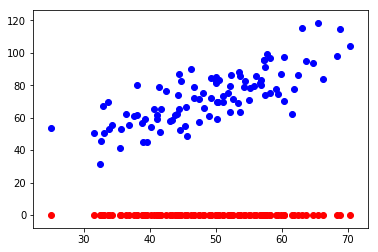

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.07273505055368648, m = 3.685351486795526, error = 12248.923658059466


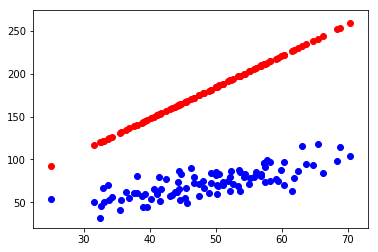

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = -0.03503133043958161, m = -1.812925535576324, error = 27125.9989614646


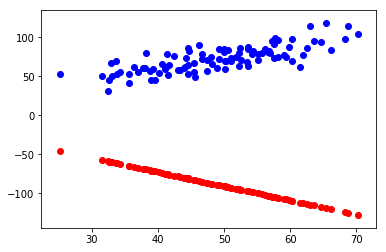

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.12649657885967047, m = 6.390068174869519, error = 60239.92274554496


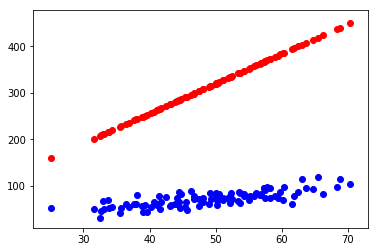

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = -0.11374200683340807, m = -5.848185220212095, error = 133946.07277683076


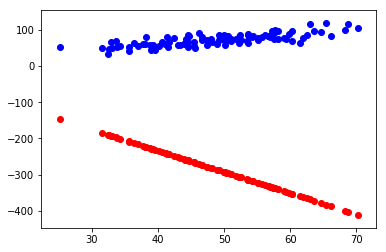

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.24542423466870028, m = 12.410337296692443, error = 298003.84433146904


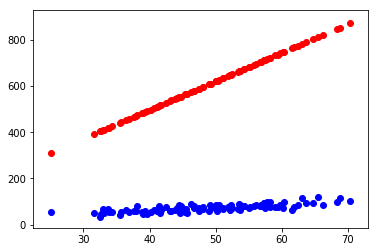

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = -0.28967567003687617, m = -14.829995329449478, error = 663169.4699413386


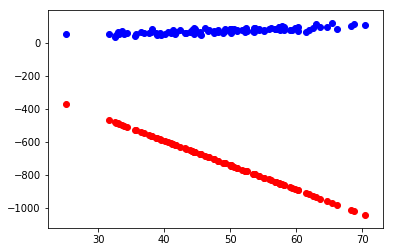

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.5094010313993653, m = 25.81048099761001, error = 1475968.1128761834


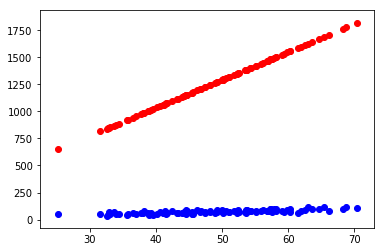

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = -0.6820116610464277, m = -34.822013381765444, error = 3285124.253337868


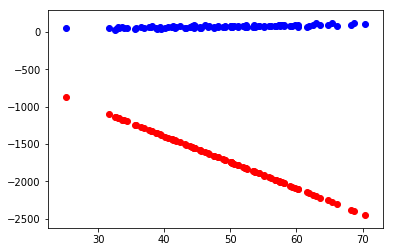

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 1.096233422691767, m = 55.6370121244165, error = 7312008.363935543


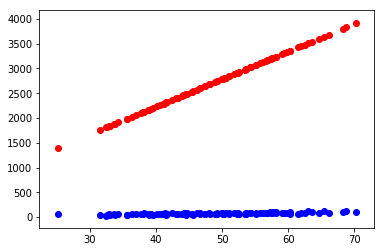

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


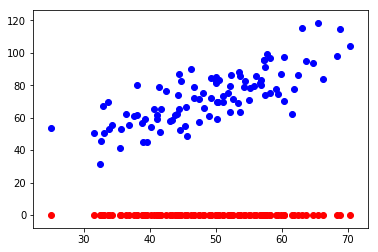

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.04364103033221188, m = 2.2112108920773155, error = 1449.470665944242


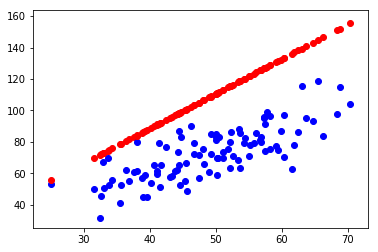

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02230154530752014, m = 1.1163155208543771, error = 440.40873307583655


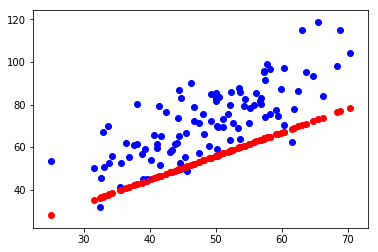

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.03313742084325126, m = 1.6584521225999558, error = 193.00931549266681


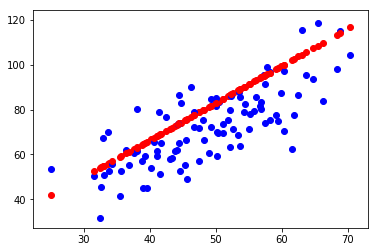

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.02804152953341927, m = 1.3900056799720335, error = 132.3524498162109


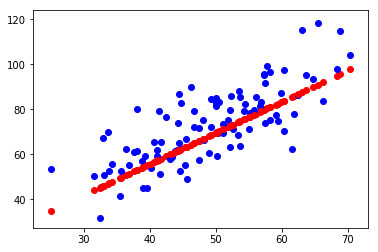

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.030834311319764406, m = 1.5229227311358462, error = 117.48066610837672


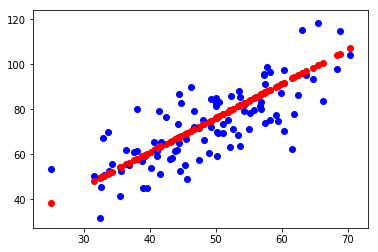

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.029720978410872838, m = 1.4571030148314494, error = 113.8343567768524


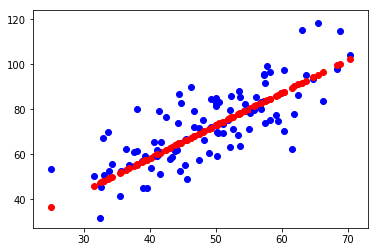

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.030541767989166777, m = 1.4896886179609883, error = 112.94028179073236


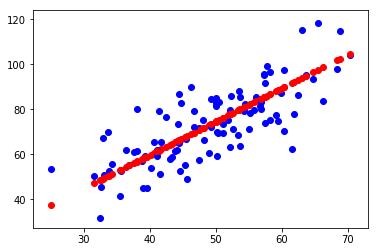

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.03040486284286565, m = 1.4735484267615937, error = 112.72099289110427


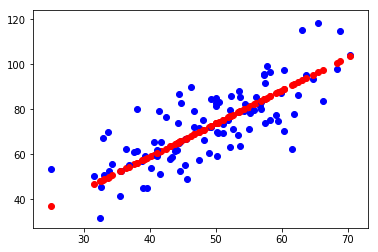

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.030742158034849188, m = 1.4815350110687533, error = 112.66714639683582


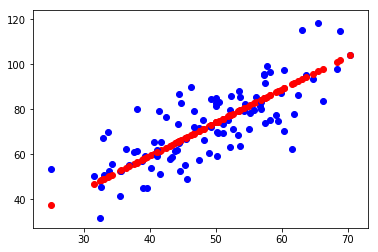

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


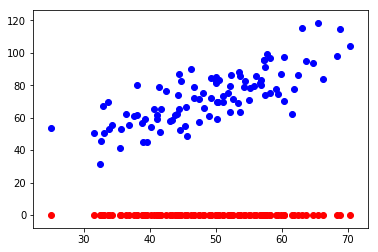

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


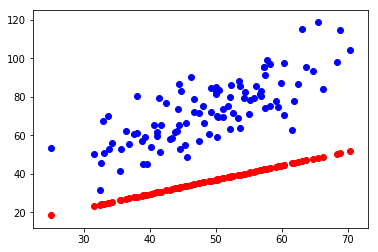

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


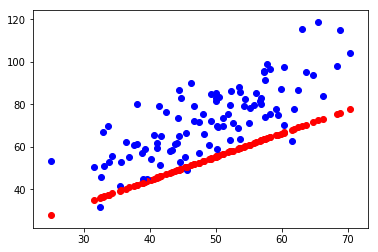

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


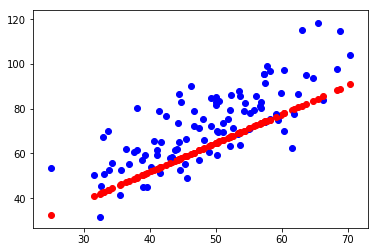

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


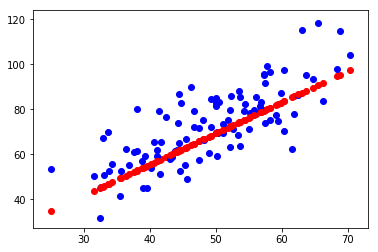

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


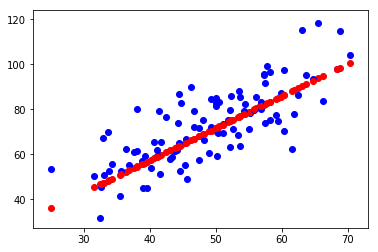

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


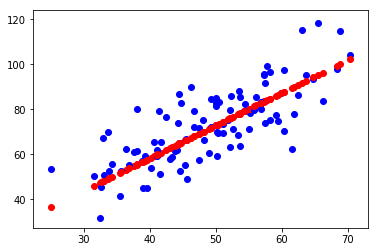

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


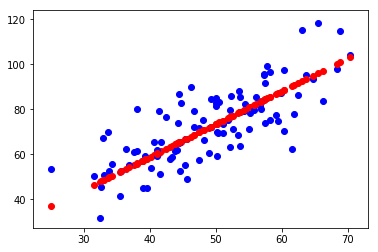

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


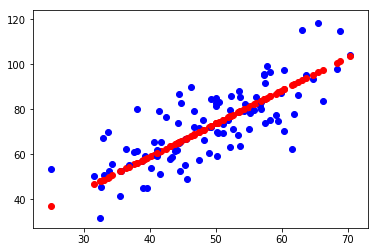

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


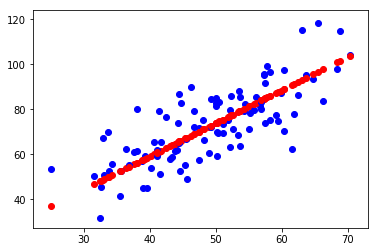

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


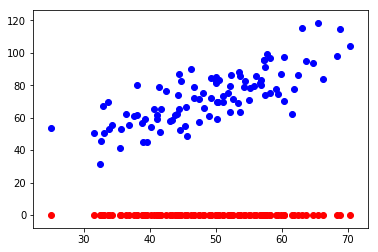

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.013092309099663567, m = 0.6633632676231948, error = 1770.7497851758349


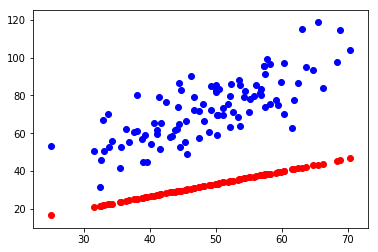

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.020336371817205802, m = 1.0291769715493666, error = 616.8806597778982


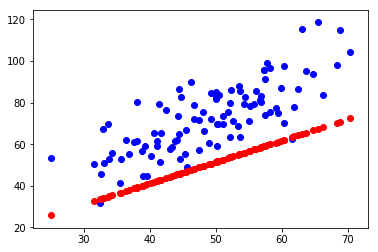

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.024355396802394527, m = 1.2309058441577725, error = 265.98757035692904


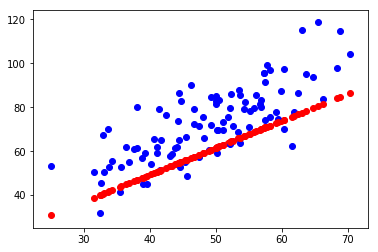

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.026595962378078725, m = 1.3421495164734216, error = 159.280513498148


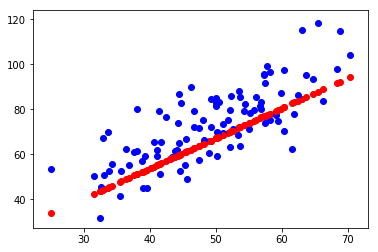

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.02785578962691917, m = 1.403494783153233, error = 126.83073933160429


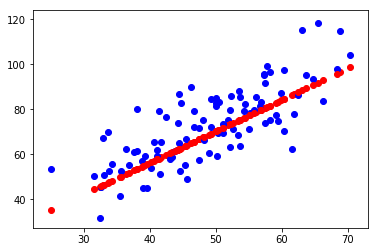

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.028574784854485915, m = 1.437323385485599, error = 116.9626991611801


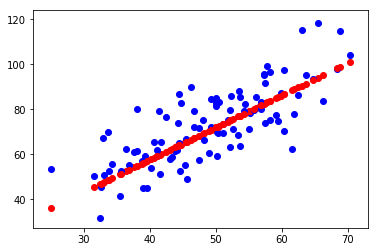

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.028995536055363747, m = 1.4559778192831356, error = 113.96179298488306


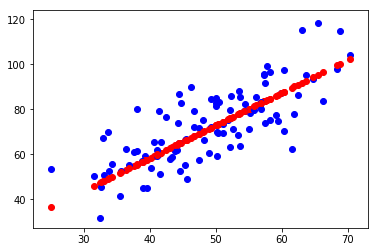

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.029251819295891688, m = 1.4662644005031922, error = 113.04919097983483


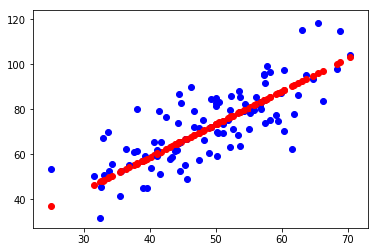

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.02941740589338449, m = 1.47193649780107, error = 112.77164492634576


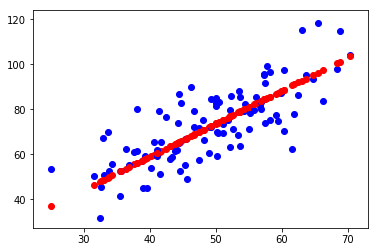

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


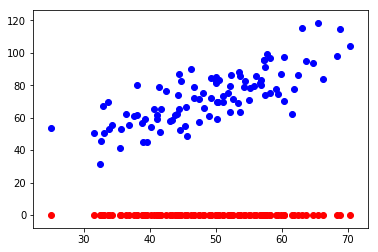

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.010182907077516106, m = 0.5159492081513736, error = 2424.3355073370544


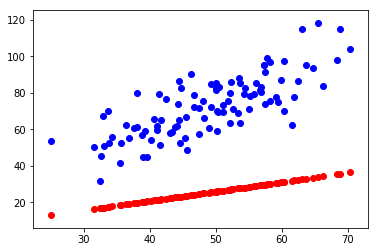

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.0168279860967119, m = 0.851899297523067, error = 1092.7384471537134


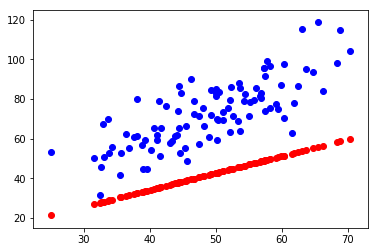

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.021169476518314904, m = 1.0706464316350868, error = 528.1796150099976


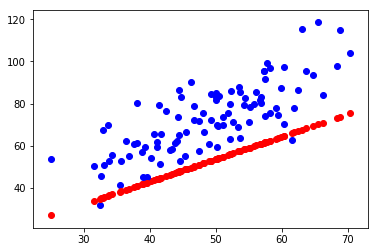

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.024011029567275754, m = 1.2130791214618601, error = 288.822908949965


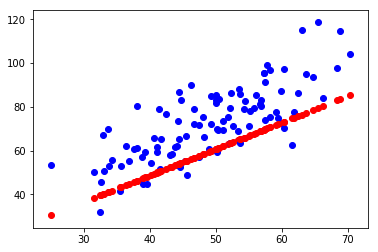

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.025875927241873892, m = 1.3058211324691424, error = 187.34254196067872


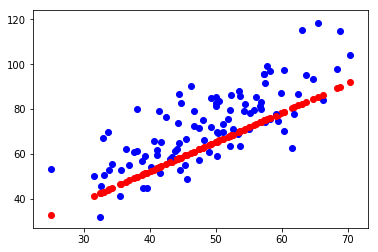

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.027104894524815917, m = 1.366208016152532, error = 144.31777335419184


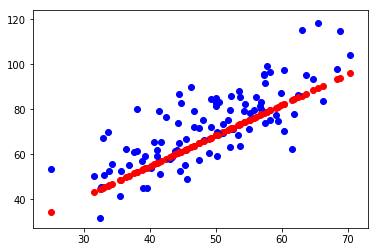

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.02791978791837441, m = 1.4055274825860637, error = 126.0764955579016


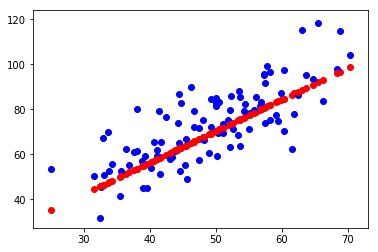

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02846506500593432, m = 1.4311293065229562, error = 118.3427043623303


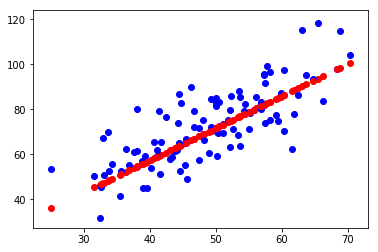

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.028834786557334218, m = 1.4477991520676863, error = 115.0637849809048


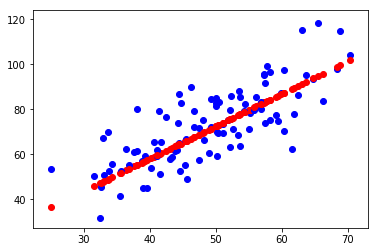

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


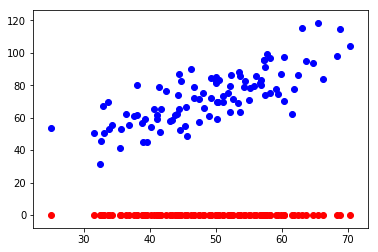

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.0072735050553686485, m = 0.3685351486795526, error = 3186.2669183340686


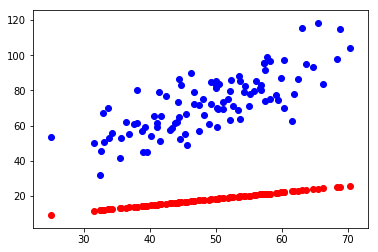

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.01274199579526775, m = 0.6452340122674316, error = 1845.2854193756275


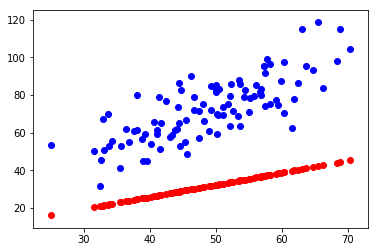

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.016855267941536783, m = 0.8529814900056218, error = 1089.3578680541548


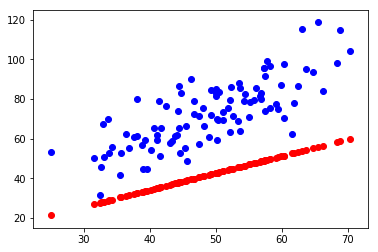

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.019951031565302785, m = 1.0089597394280754, error = 663.2323265001876


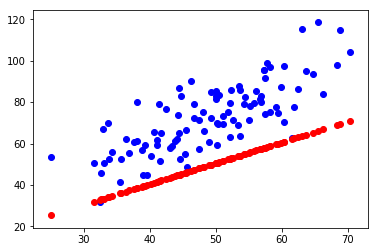

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.022282841973126334, m = 1.1260692559400733, error = 423.02017991777734


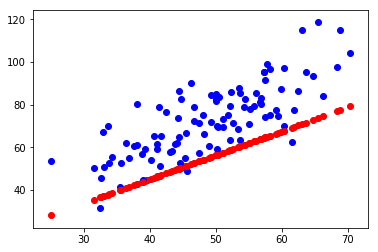

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02404107043012985, m = 1.2139958302447225, error = 287.60967009381125


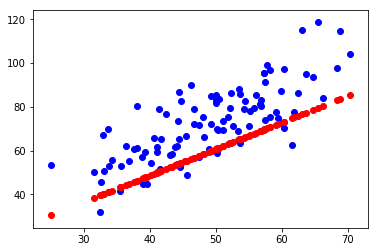

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.025368649139452446, m = 1.2800116281462905, error = 211.27711465249791


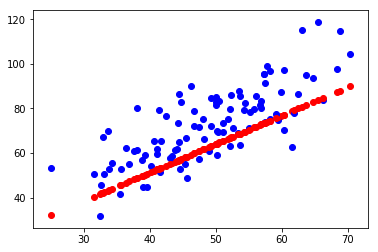

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.026372892693351885, m = 1.329576647398786, error = 168.24751899306284


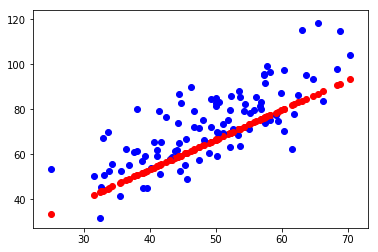

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.02713437370918469, m = 1.366790296112002, error = 143.99120588588545


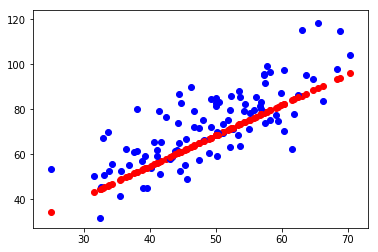

In [37]:
learning_rating=[0.0005,0.0003,0.0001,0.00009,0.00007,0.00005]
for rate in learning_rating:
    for num in range(0,10):
        run_w_rating(num,learning_rate=rate)
        plt.show()

##### Ans:
For this part we choose six learning rate. Two are greater than 0.0001 and three are less than 0.0001. Under each learning rate we perform ten times iterations.For 0.0005 learning rate, we notice the parameters every time updated vibrate up and down the dataset and are much more far from the datasets every time updated. For 0.0003 learing rate, the paramenters also vibrate up and down the dataset. Fortunately, the paramenters tends to converge to the optimal. For those whose learning rate under 0.0001, they perform a story that, the less the learning rate is , the less slowly the parameters converge. This is intuitively understandable in our daily life. When we learn something, neither learning too fast or too slowly are the good ways learning things. Finding a proper learning rate can make the learning procedure effective.